# Efficient Data Stream Anomaly Detection

### With processed data


In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt



In [2]:
# Load the dataset
data_df = pd.read_csv(r'E:\NIKHIL\ML\Cobblestone proj\data\preprocessed data\processed_Synthetic_Financial_datasets_log.csv')

In [3]:
# Label encode the 'type' column (e.g., PAYMENT, TRANSFER, etc.)
le = LabelEncoder()
data_df['type_encoded'] = le.fit_transform(data_df['type'])

# Select relevant features for anomaly detection
features = ['type_encoded', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']

# Standardize the data
scaler = StandardScaler()
data_df[features] = scaler.fit_transform(data_df[features])

In [4]:
# Train the Isolation Forest on the selected features
iso_forest = IsolationForest(n_estimators=100,   # Number of base estimators (trees)
                             contamination=0.01, # Proportion of outliers in the data
                             max_samples='auto', # Subsampling for efficiency
                             random_state=42)    # Seed for reproducibility

iso_forest.fit(data_df[features])

# Predict anomalies (-1 means anomaly, 1 means normal)
data_df['anomaly'] = iso_forest.predict(data_df[features])

# Filter and display the detected anomalies
anomalies = data_df[data_df['anomaly'] == -1]

print(f"Number of anomalies detected: {len(anomalies)}")
print(anomalies.head())

# Save the results for future analysis
anomalies.to_csv('detected_anomalies.csv', index=False)
print("Anomalies have been saved to 'detected_anomalies.csv'.")

Number of anomalies detected: 63612
     step      type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
359     1  TRANSFER  3.712322   C106297322      -0.288716       -0.292442   
362     1  TRANSFER  2.115317   C396918327      -0.288716       -0.292442   
375     1  TRANSFER  3.917503  C1057507014      -0.288716       -0.292442   
376     1  TRANSFER  3.115336  C2007599722      -0.288716       -0.292442   
432     1   CASH_IN  0.280933   C173791568       2.249241        2.333966   

        nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  \
359  C1590550415        2.181392        4.883936        0               0   
362  C1590550415        2.893793        4.883936        0               0   
375  C1590550415        3.322488        4.883936        0               0   
376  C1590550415        4.071339        4.883936        0               0   
432  C1590550415        4.677686        4.883936        0               0   

     type_encoded  anomaly  
359      

c:\Users\Admin\miniconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


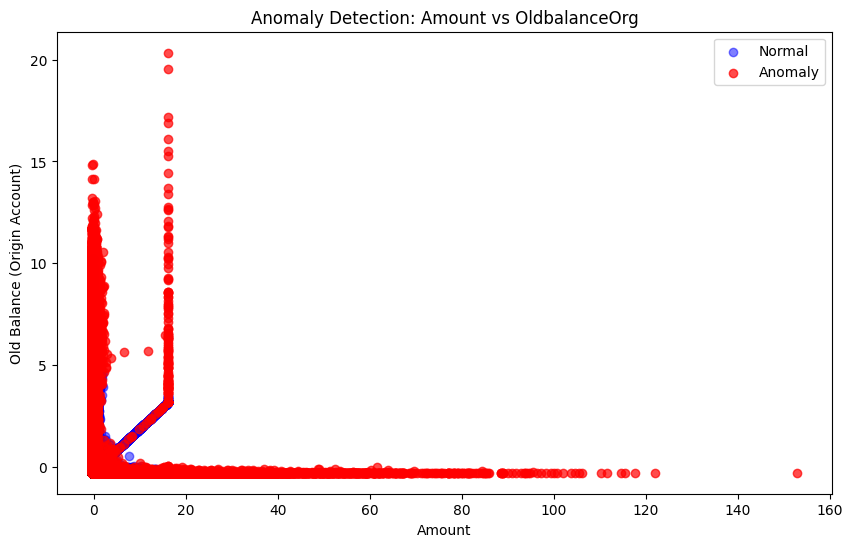

In [5]:
# Visualization
plt.figure(figsize=(10, 6))

# Plot normal data points (non-anomalies)
plt.scatter(data_df[data_df['anomaly'] == 1]['amount'], data_df[data_df['anomaly'] == 1]['oldbalanceOrg'], 
            c='blue', label='Normal', alpha=0.5)

# Plot anomalies
plt.scatter(anomalies['amount'], anomalies['oldbalanceOrg'], 
            c='red', label='Anomaly', alpha=0.7)

# Add labels and title
plt.title('Anomaly Detection: Amount vs OldbalanceOrg')
plt.xlabel('Amount')
plt.ylabel('Old Balance (Origin Account)')
plt.legend()

# Show the plot
plt.show()


### With original data

In [6]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt


In [7]:

# Load the dataset
data_df = pd.read_csv(r'E:\NIKHIL\ML\Cobblestone proj\data\Synthetic_Financial_datasets_log.csv')

In [8]:
# Label encode the 'type' column (e.g., PAYMENT, TRANSFER, etc.)
le = LabelEncoder()
data_df['type_encoded'] = le.fit_transform(data_df['type'])

# Select relevant features for anomaly detection
features = ['type_encoded', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']

# Standardize the data
scaler = StandardScaler()
data_df[features] = scaler.fit_transform(data_df[features])

In [9]:
# Train the Isolation Forest on the selected features
iso_forest = IsolationForest(n_estimators=100,   # Number of base estimators (trees)
                             contamination=0.01, # Proportion of outliers in the data
                             max_samples='auto', # Subsampling for efficiency
                             random_state=42)    # Seed for reproducibility

iso_forest.fit(data_df[features])

# Predict anomalies (-1 means anomaly, 1 means normal)
data_df['anomaly'] = iso_forest.predict(data_df[features])

# Filter and display the detected anomalies
anomalies = data_df[data_df['anomaly'] == -1]

print(f"Number of anomalies detected: {len(anomalies)}")
print(anomalies.head())

# Save the results for future analysis
anomalies.to_csv('detected_anomalies.csv', index=False)
print("Anomalies have been saved to 'detected_anomalies.csv'.")

Number of anomalies detected: 63612
     step      type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
359     1  TRANSFER  3.712322   C106297322      -0.288716       -0.292442   
362     1  TRANSFER  2.115317   C396918327      -0.288716       -0.292442   
375     1  TRANSFER  3.917503  C1057507014      -0.288716       -0.292442   
376     1  TRANSFER  3.115336  C2007599722      -0.288716       -0.292442   
432     1   CASH_IN  0.280933   C173791568       2.249241        2.333966   

        nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  \
359  C1590550415        2.181392        4.883936        0               0   
362  C1590550415        2.893793        4.883936        0               0   
375  C1590550415        3.322488        4.883936        0               0   
376  C1590550415        4.071339        4.883936        0               0   
432  C1590550415        4.677686        4.883936        0               0   

     type_encoded  anomaly  
359      

c:\Users\Admin\miniconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


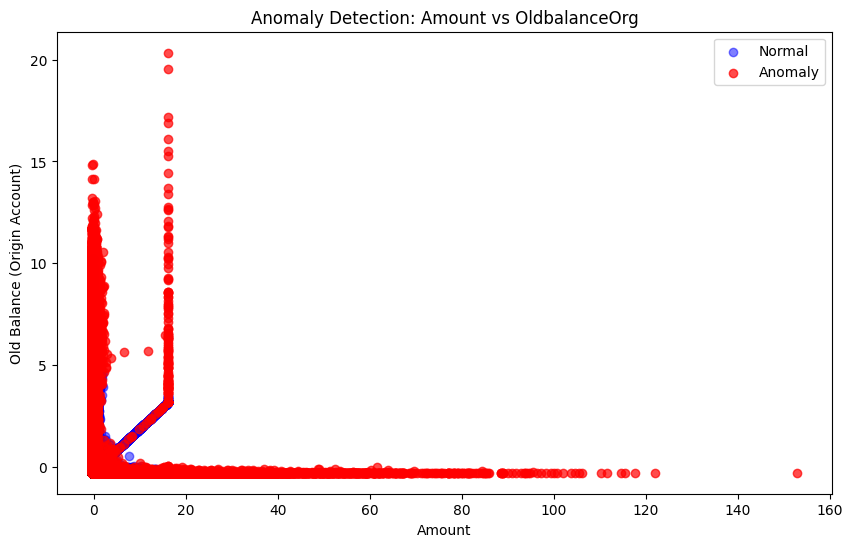

In [10]:
# Visualization
plt.figure(figsize=(10, 6))

# Plot normal data points (non-anomalies)
plt.scatter(data_df[data_df['anomaly'] == 1]['amount'], data_df[data_df['anomaly'] == 1]['oldbalanceOrg'], 
            c='blue', label='Normal', alpha=0.5)

# Plot anomalies
plt.scatter(anomalies['amount'], anomalies['oldbalanceOrg'], 
            c='red', label='Anomaly', alpha=0.7)

# Add labels and title
plt.title('Anomaly Detection: Amount vs OldbalanceOrg')
plt.xlabel('Amount')
plt.ylabel('Old Balance (Origin Account)')
plt.legend()

# Show the plot
plt.show()


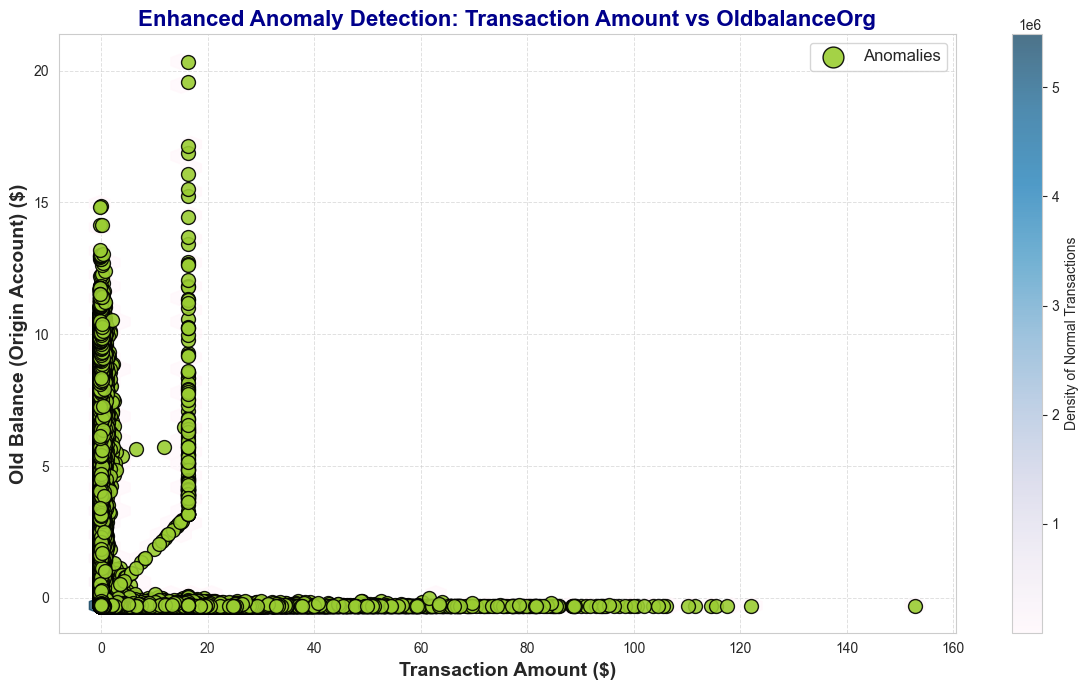

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set a modern style
sns.set_style("whitegrid")

# Create a figure with a larger size
plt.figure(figsize=(12, 7))

# Use a hexbin plot for density with transparency for normal data
hb = plt.hexbin(data_df['amount'], data_df['oldbalanceOrg'], 
                gridsize=40, cmap='PuBu', mincnt=1, alpha=0.7)

# Use a colormap for anomalies with circles instead of stars
plt.scatter(anomalies['amount'], anomalies['oldbalanceOrg'], 
            s=100, color='yellowgreen', edgecolor='black', 
            marker='o', label='Anomalies', alpha=0.9)

# Add a color bar for the hexbin density
cb = plt.colorbar(hb, label='Density of Normal Transactions')

# Add grid with light transparency for better readability
plt.grid(True, which='both', linestyle='--', linewidth=0.7, alpha=0.6)

# Adding labels and title with some styling
plt.xlabel('Transaction Amount ($)', fontsize=14, fontweight='bold')
plt.ylabel('Old Balance (Origin Account) ($)', fontsize=14, fontweight='bold')
plt.title('Enhanced Anomaly Detection: Transaction Amount vs OldbalanceOrg', 
          fontsize=16, fontweight='bold', color='darkblue')

# Customize the legend, using circles for anomalies
plt.legend(loc='upper right', fontsize=12, markerscale=1.5)

# Add some padding around the plot
plt.tight_layout()

# Show the plot
plt.show()


c:\Users\Admin\miniconda3\Lib\site-packages\matplotlib\collections.py:996: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


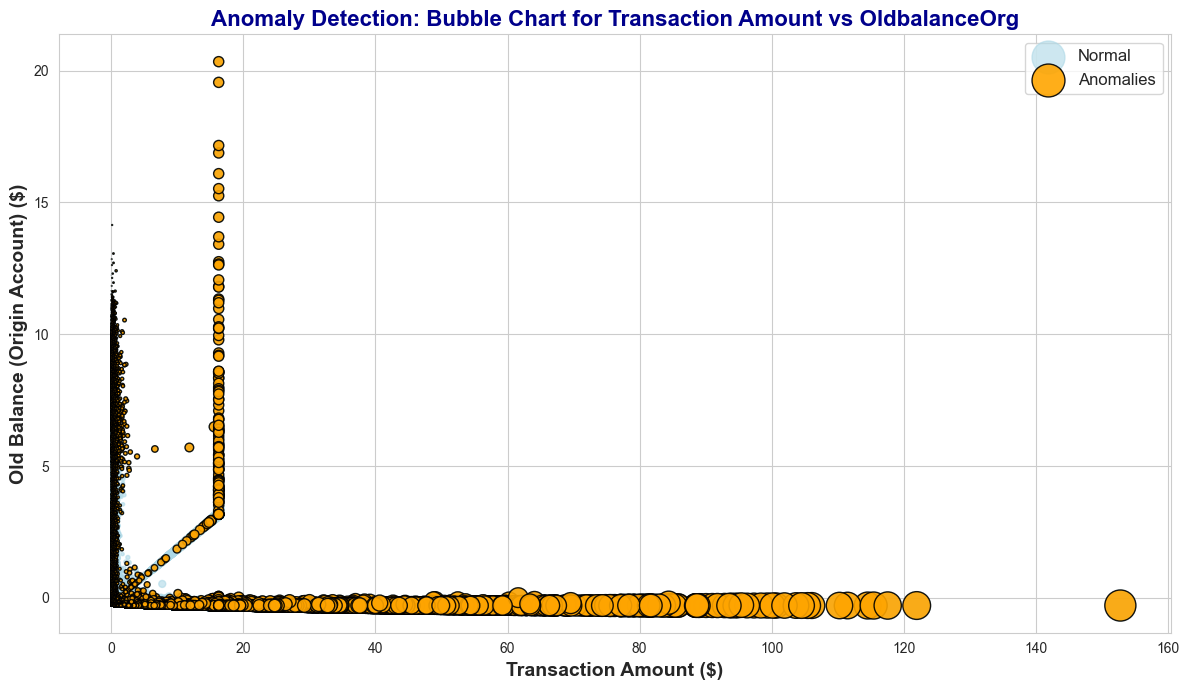

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a style
sns.set_style("whitegrid")

# Create a figure with a larger size
plt.figure(figsize=(12, 7))

# Bubble sizes vary based on transaction amount
sizes_normal = data_df['amount'] / data_df['amount'].max() * 500
sizes_anomalies = anomalies['amount'] / anomalies['amount'].max() * 500

# Plot normal transactions with varying bubble size
plt.scatter(data_df['amount'], data_df['oldbalanceOrg'], 
            s=sizes_normal, color='lightblue', alpha=0.6, label='Normal')

# Plot anomalies with varying bubble size
plt.scatter(anomalies['amount'], anomalies['oldbalanceOrg'], 
            s=sizes_anomalies, color='orange', edgecolor='black', 
            label='Anomalies', alpha=0.9)

# Add axis labels and title with styling
plt.xlabel('Transaction Amount ($)', fontsize=14, fontweight='bold')
plt.ylabel('Old Balance (Origin Account) ($)', fontsize=14, fontweight='bold')
plt.title('Anomaly Detection: Bubble Chart for Transaction Amount vs OldbalanceOrg', 
          fontsize=16, fontweight='bold', color='darkblue')

# Customize the legend
plt.legend(loc='upper right', fontsize=12, markerscale=1.5)

# Add padding around the plot
plt.tight_layout()

# Show the plot
plt.show()
